Generates Fig.3 and extended data fig. 3

#### Load Libraries

In [1]:
library(plyr)
library(tidyverse)
library(ggpubr)
library(rcompanion)
library(ggmosaic)
library(caret)
library(ggthemes)
library(gridExtra)  
library(extrafont)
library(ggrepel)
library(stringr)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::desc()      masks plyr::desc()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()
ℹ Use the conflicted package (<http://conflicted.

In [2]:
# loadfonts(device = "all")
# loadfonts(device = "postscript")

In [3]:
# Using Arial in
# R https://fromthebottomoftheheap.net/2013/09/09/preparing-figures-for-plos-one-with-r/

In [4]:
source("utils/plot_theme.r")

### Read in merged data

In [5]:
Omics_analysis_DF = read_delim(file = "data/omics_LLM_Enrichr_simVals_analyses_DF.tsv", delim = "\t") 

Rows: 250 Columns: 28
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (11): Source, GeneSetID, GeneSetName, GeneList, LLM Name, LLM Analysis, ...
dbl (17): ...1, index, n_Genes, Score, Rank, P-value, Adjusted P-value, Orig...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
dim(Omics_analysis_DF)

[1] 250  28

In [7]:
geneSetsToLabel = c("Histone Modification", "Hedgehog Signaling")
#, "Notch Signaling",
#                    "Ubiquitin regulation of p53 activity", "p53 regulation of cell cycle", 
#                   "Pancreas Beta Cells", "Interferon Alpha Response", "RAS-RAF-MAPK", 
#                    "ATM-independent DNA repair", "Estrogen Response Early", "Nucleus" )

In [8]:
bioAcronymsList = c("RAS-RAF-MAPK") # based only in genesets to be labeled

In [11]:
Omics_analysis_DF = Omics_analysis_DF %>%
mutate(labelName = ifelse(tolower(`GeneSetName`) %in% tolower(geneSetsToLabel), 
                          ifelse(`GeneSetName` %in% bioAcronymsList,`GeneSetName`, str_to_sentence(`GeneSetName`)),
                         ""))

In [61]:
Omics_analysis_DF$labelName

[1] ""                     ""                     ""                    
  [4] ""                     ""                     ""                    
  [7] ""                     ""                     ""                    
 [10] ""                     ""                     ""                    
 [13] ""                     ""                     ""                    
 [16] ""                     ""                     ""                    
 [19] ""                     ""                     ""                    
 [22] ""                     ""                     ""                    
 [25] ""                     ""                     ""                    
 [28] ""                     ""                     ""                    
 [31] ""                     ""                     ""                    
 [34] ""                     ""                     ""                    
 [37] ""                     ""                     ""                    
 [40] ""                     ""                     ""                    
 [43] ""                     ""                     ""                    
 [46] ""                     ""                     ""                    
 [49] ""                     ""                     ""                    
 [52] ""                     ""                     ""                    
 [55] ""                     ""                     ""                    
 [58] ""                     ""                     ""                    
 [61] ""                     ""                     ""                    
 [64] ""                     ""                     ""                    
 [67] ""                     ""                     ""                    
 [70] ""                     ""                     ""                    
 [73] ""                     ""                     ""                    
 [76] ""                     ""                     ""                    
 [79] ""                     ""                     ""                    
 [82] ""                     ""                     ""                    
 [85] ""                     ""                     ""                    
 [88] ""                     ""                     ""                    
 [91] ""                     ""                     ""                    
 [94] ""                     ""                     ""                    
 [97] ""                     ""                     ""                    
[100] ""                     ""                     ""                    
[103] ""                     ""                     ""                    
[106] ""                     ""                     ""                    
[109] ""                     ""                     ""                    
[112] ""                     ""                     ""                    
[115] ""                     ""                     ""                    
[118] ""                     ""                     ""                    
[121] ""                     "Hedgehog signaling"   ""                    
[124] ""                     ""                     ""                    
[127] ""                     ""                     ""                    
[130] ""                     ""                     ""                    
[133] ""                     ""                     ""                    
[136] ""                     ""                     ""                    
[139] ""                     ""                     ""                    
[142] ""                     ""                     ""                    
[145] ""                     ""                     ""                    
[148] ""                     ""                     ""                    
[151] ""                     ""                     ""                    
[154] ""                     ""                     ""                    
[157] ""                     ""                     ""                    
[160] ""                   

In [63]:
Omics_analysis_DF %>%
subset(tolower(labelName) %in% tolower(geneSetsToLabel)) %>%
select(c("labelName", "LLM Name", "GO term"))

labelName,LLM Name,GO term
<chr>,<chr>,<chr>
Hedgehog signaling,Neural Development and Axon Guidance,Nervous System Development
Histone modification,Chromatin Modification and Transcriptional Regulation,Negative Regulation Of Transcription By RNA Polymerase II


In [14]:
Omics_analysis_long_DF = Omics_analysis_DF[,c("labelName", "GeneSetName", "LLM_name_human_name_sim",
                                              "GO_term_human_name_sim", "log2_n_Genes", "Source")] %>%
pivot_longer(cols = c("LLM_name_human_name_sim" ,"GO_term_human_name_sim"),
             names_to = "sim_option",
             values_to = "sim_value")

In [ ]:
if (!dir.exists("figures")){
    dir.create("figures")}

#### Genes captured figures

In [15]:
merged_analysis_long_percOverlap_DF = Omics_analysis_DF[,c("labelName", "GeneSetName", "log2_n_Genes",
                                                           "perc_overlap_LLM" ,"perc_overlap_Enrichr", "Source")] %>%
pivot_longer(cols = c("perc_overlap_LLM" ,"perc_overlap_Enrichr"),
             names_to = "analysisType",
             values_to = "perc_overlap")

In [16]:
my_comparisonsOverlap <- list( c("perc_overlap_LLM", "perc_overlap_Enrichr") )


In [17]:
pos <- position_jitter( seed = 1, width = 0.2)

In [18]:
labelNameStr =  merged_analysis_long_percOverlap_DF$labelName;

In [19]:
merged_analysis_long_percOverlap_DF$Source %>% unique()

[1] "Disease"         "Gene Expression" "MSigDB"          "NeST"           
[5] "Perturbation"

In [71]:
for (sourceStr in c("MSigDB", "NeST", "Disease", "Gene Expression", "Perturbation")){
    
    print(sourceStr)
    
    sourceSubset = merged_analysis_long_percOverlap_DF %>%
    subset(Source == sourceStr)
    
    print("LLM")
    sourceSubset %>%
    subset(analysisType == "perc_overlap_LLM") %>%
    pull(perc_overlap) %>%
    summary() %>% print()
    
    print("GO")
    sourceSubset %>%
    subset(analysisType == "perc_overlap_Enrichr") %>%
    pull(perc_overlap) %>%
    summary() %>% print()
    
    print("============")
    }
 

[1] "MSigDB"
[1] "LLM"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.00   15.10   21.75   29.67   38.51   96.88 
[1] "GO"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.963   8.375  17.000  18.174  26.522  49.425 
[1] "============"
[1] "NeST"
[1] "LLM"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.47  100.00  100.00   94.47  100.00  100.00 
[1] "GO"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.43   45.83   62.50   62.80   78.75  100.00 
[1] "============"
[1] "Disease"
[1] "LLM"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.91  100.00  100.00   92.84  100.00  100.00 
[1] "GO"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.348  28.571  50.000  46.776  66.667 100.000 
[1] "============"
[1] "Gene Expression"
[1] "LLM"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34.09   93.33   96.67   87.72  100.00  100.00 
[1] "GO"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   8.333  13.636  24.327  31.250 100.000 
[1] "============"
[1] 

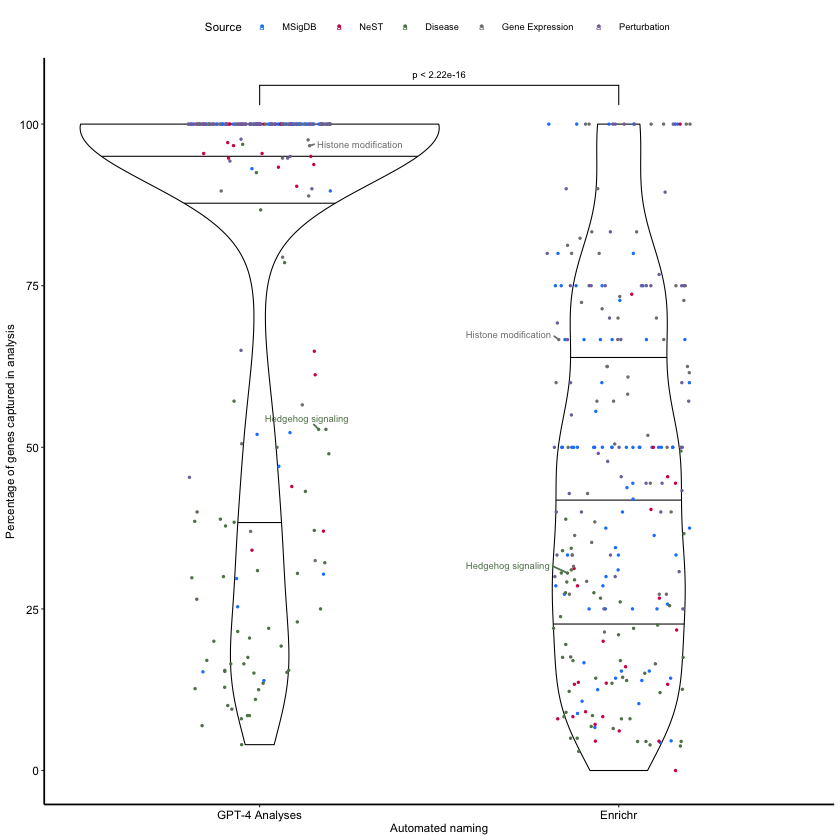

In [57]:
boxPlot_overlap_new_plot = merged_analysis_long_percOverlap_DF %>%
    ggviolin(size = 0.3, x = "analysisType", y = "perc_overlap", 
            draw_quantiles = c(0.25, 0.5, 0.75),
            ylab = "Percentage of genes captured in analysis" , xlab = "Automated naming",
            trim  = TRUE, ylim = c(0, 105)) +
    geom_jitter( aes(color = factor(Source)), size = 0.3, position = position_jitter(seed = 1, width = 0.2)) +
    geom_text_repel(aes(color = factor(Source)), position = pos, label = labelNameStr, 
                    max.overlaps = 100, size = 2, min.segment.length = 0.01) +
  scale_colour_manual(name="Source", labels = c("MSigDB", "NeST", "Disease", "Gene Expression", "Perturbation"), 
                      values=c("#1A85FF", "#D41159", "#5f8159", "#808080", "#8271ab"))+
scale_x_discrete(labels=c("perc_overlap_LLM" = "GPT-4 Analyses", "perc_overlap_Enrichr" = "Enrichr")) + 
stat_compare_means(comparisons = my_comparisonsOverlap,label.y = 101, 
                   label = "p.format", size = 2)  +
theme_pubr_SA(base_family = "Arial", legend = "top") 
   

boxPlot_overlap_new_plot

In [23]:
merged_analysis_long_percOverlap_DF %>%
subset(analysisType == "perc_overlap_LLM") %>%
subset(Source == "NeST") %>%
pull(perc_overlap) %>%
summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.47  100.00  100.00   94.47  100.00  100.00 

In [24]:
ggsave(filename = "figures/fig3_overlap_revision.png", plot = boxPlot_overlap_new_plot, height = 7, width = 7)


In [25]:
ggsave(file="figures/fig3_overlap_revision.svg", plot=boxPlot_overlap_new_plot, height = 7, width = 7)


In [ ]:
colnames(merged_analysis_long_DF)

### Semantic similarity plot

In [26]:
posSimSem <- position_jitter(seed = 1, width = 0.2)

In [27]:
labelNameStrSimSem =  Omics_analysis_long_DF$labelName;

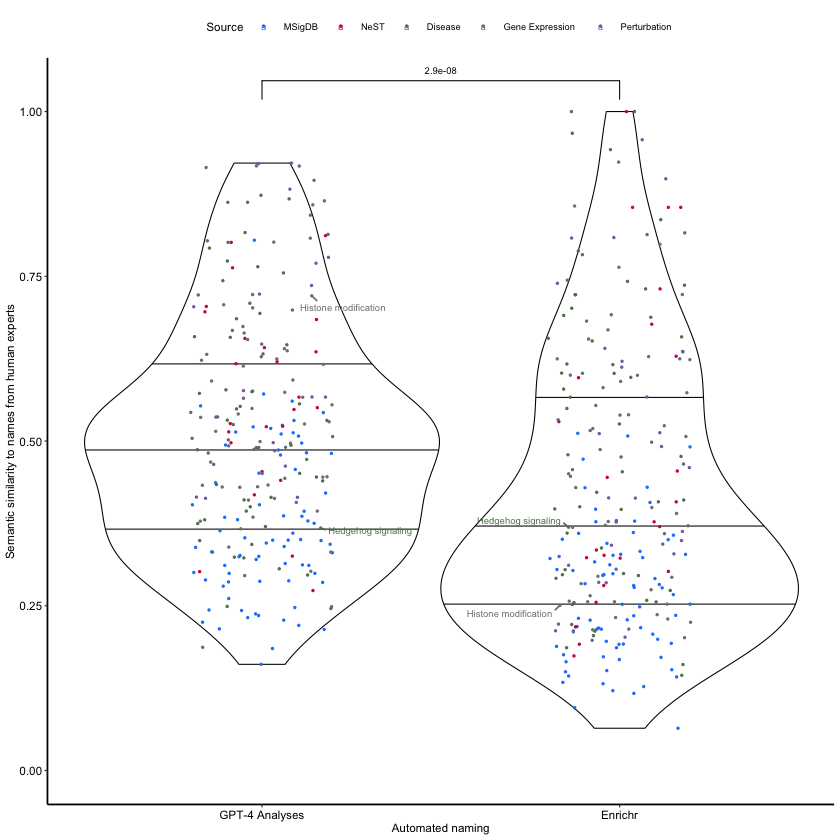

In [34]:
my_comparisons_semsim = list(c("LLM_name_human_name_sim", "GO_term_human_name_sim"))

boxPlot_simplist_2_plot = Omics_analysis_long_DF %>%
    ggviolin(size = 0.3, x = "sim_option", y = "sim_value",
            draw_quantiles = c(0.25, 0.5, 0.75),
            ylab  = "Semantic similarity to names from human experts",
             xlab = "Automated naming", trim = TRUE, ylim = c(0, 1.03))+
    geom_jitter(aes(color = factor(Source)),size = 0.3, position = position_jitter(seed = 1, width = 0.2)) +
geom_text_repel(aes(color = factor(Source)), position = posSimSem, label = labelNameStrSimSem, 
                    max.overlaps = 100, size = 2, min.segment.length = 0.01)+
scale_colour_manual(name="Source", labels = c("MSigDB", "NeST", "Disease", "Gene Expression", "Perturbation"), 
                     values=c("#1A85FF", "#D41159", "#5f8159", "#808080", "#8271ab")) + 
scale_x_discrete(labels=c("LLM_name_human_name_sim" = "GPT-4 Analyses", "GO_term_human_name_sim" = "Enrichr")) +
stat_compare_means(comparisons = my_comparisons_semsim, 
                   label.y = 1, label = "p.format", size = 2) + 
theme_pubr_SA(base_family = "Arial", legend = "top")

boxPlot_simplist_2_plot

#

In [65]:
for (sourceStr in c("MSigDB", "NeST", "Disease", "Gene Expression", "Perturbation")){
    
    print(sourceStr)
    
    sourceSubset = Omics_analysis_long_DF %>%
    subset(Source == sourceStr)
    
    print("LLM_name_human_name_sim")
    sourceSubset %>%
    subset(sim_option == "LLM_name_human_name_sim") %>%
    pull(sim_value) %>%
    summary() %>% print()
    
    print("GO_term_human_name_sim")
    sourceSubset %>%
    subset(sim_option == "GO_term_human_name_sim") %>%
    pull(sim_value) %>%
    summary() %>% print()
    
    print("============")
    }
 

[1] "MSigDB"
[1] "LLM_name_human_name_sim"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2459  0.3954  0.5281  0.5387  0.6788  0.8730 
[1] "GO_term_human_name_sim"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1445  0.2976  0.4646  0.4835  0.6431  1.0000 
[1] "============"
[1] "NeST"
[1] "LLM_name_human_name_sim"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2487  0.4312  0.5070  0.5255  0.6157  0.9151 
[1] "GO_term_human_name_sim"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2016  0.2591  0.3946  0.4400  0.5881  0.9233 
[1] "============"
[1] "Disease"
[1] "LLM_name_human_name_sim"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1611  0.2892  0.3496  0.3732  0.4788  0.8048 
[1] "GO_term_human_name_sim"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06417 0.19154 0.25238 0.26519 0.32798 0.51177 
[1] "============"
[1] "Gene Expression"
[1] "LLM_name_human_name_sim"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2731  0.4974  0.5507  0.5636  0.6558

In [67]:
?summary

summary {base},R Documentation
object,an object for which a summary is desired.
x,a result of the default method of summary().
maxsum,"integer, indicating how many levels should be shown for factors."
digits,"integer, used for number formatting with signif() (for summary.default) or format() (for summary.data.frame). In summary.default, if not specified (i.e., missing(.)), signif() will not be called anymore (since R >= 3.4.0, where the default has been changed to only round in the print and format methods)."
quantile.type,"integer code used in quantile(*, type=quantile.type) for the default method."
...,additional arguments affecting the summary produced.


In [37]:
ggsave(filename = "figures/fig3_semsim_revision.png", plot = boxPlot_simplist_2_plot, height = 7, width = 7)
ggsave(file="figures/fig3_semsim_revision.svg", plot=boxPlot_simplist_2_plot, height = 7, width = 7)


### Plot distribution of number of genes faceted by DataSet

In [38]:
nGenes_count_Hist = gghistogram(data = Omics_analysis_DF, x = "n_Genes", 
                                y = "count", bins = 100) %>%
 ggpar(size = 0.3,
     font.x = c(16),
     font.y = c(16),
     xlab = "Number of genes",
     ylab = "Count") +
theme_pubr_SA(base_family = "Arial", legend = "none")



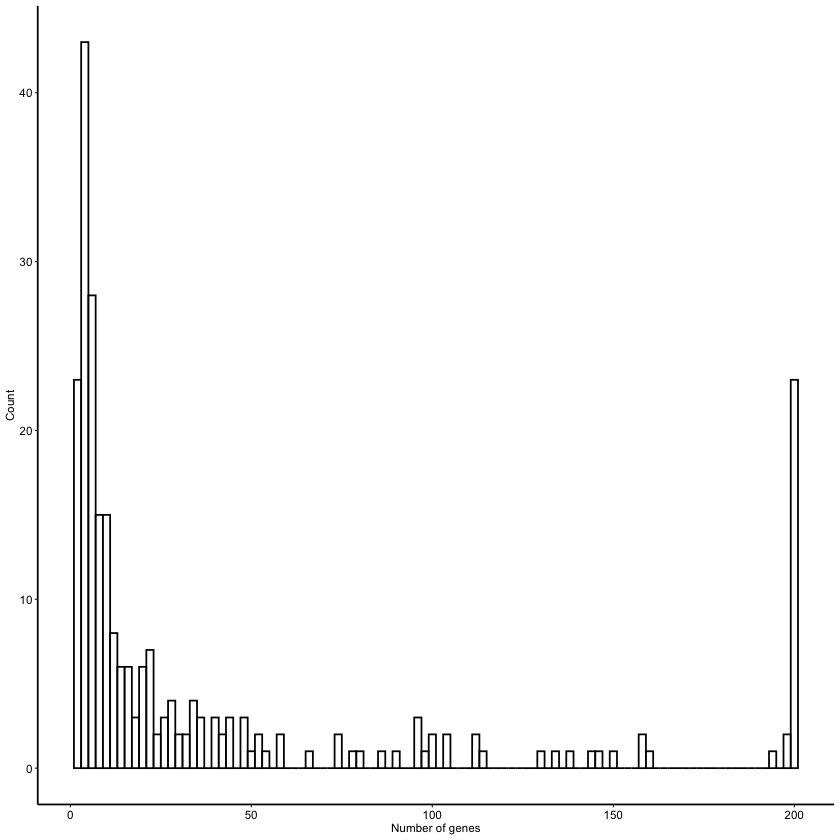

In [39]:
nGenes_count_Hist

In [40]:
ggsave(filename = "figures/Omics_geneSetSizes_revision.png", plot = nGenes_count_Hist, units = "in", 
       width = 7, height = 5, dpi = 600)


In [41]:
ggsave(filename = "figures/Omics_geneSetSizes_revision.svg", plot = nGenes_count_Hist, units = "in", 
       width = 7, height = 4, dpi = 600)
